# 3.1 Classification with a single-layer perceptron

In [45]:
#import
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1000)
from mlxtend.plotting import plot_decision_regions

## 3.1.1 Generation of linearly-separable data

In [46]:
n = 100
mA = [1,0.5]
sigmaA=0.5
mB = [-1,0]
sigmaB = 0.5
cov = np.eye(2)
classA = np.random.multivariate_normal(mA,sigmaA*sigmaA*cov,n)
classB = np.random.multivariate_normal(mB,sigmaB*sigmaB*cov,n)

inputs = np.concatenate((classA, classB))
targets = np.concatenate((np.ones(classA.shape[0],dtype=int), -np.ones(classB.shape[0],dtype=int)))
N = inputs.shape[0]  # Number of rows (samples)
permute = list(range(N))
np.random.shuffle(permute)
inputs = inputs[permute, :]
targets = targets[permute]

## 3.1.2 Classification with a single-layer perceptron and analysis

### question 1
Apply and compare perceptron learning with the Delta learning rule in batch mode on the generated dataset. Adjust the learning rate and study the convergence of the two algorithms.

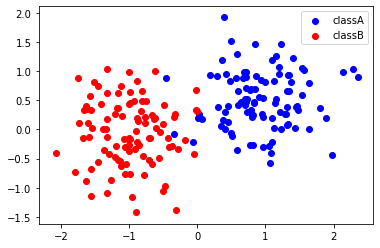

In [47]:
# show the data
plt.scatter([p[0] for p in classA], [p[1] for p in classA], c='blue', label='classA')
plt.scatter([p[0] for p in classB], [p[1] for p in classB], c='red', label='classB')
plt.legend()
plt.show()

### Perceptron

In [48]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

* boundary

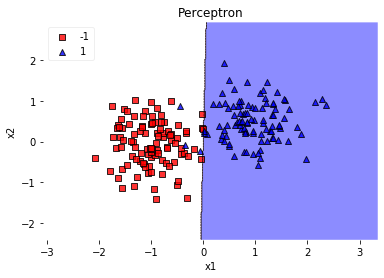

In [49]:
X = inputs
y = targets
EPOCH =20
eta=0.01
ppn = Perceptron(epochs=EPOCH, eta=eta)
ppn.train(X, y)
plot_decision_regions(X, y, clf=ppn,legend=2,colors='red,blue')
plt.title('Perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('imgs/perceptron_eta{}.png'.format(str(eta)))
plt.show()

* converge

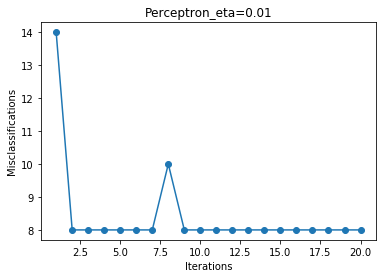

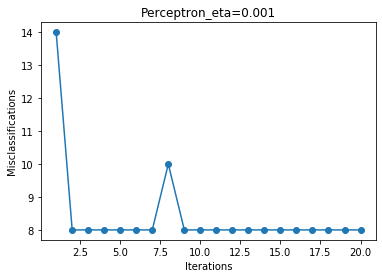

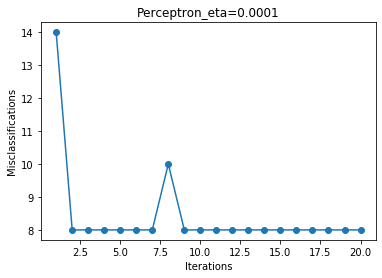

In [50]:
for eta in [0.01,0.001,0.0001]:
    ppn = Perceptron(epochs=EPOCH, eta=eta)
    ppn.train(X, y)
    plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
    plt.xlabel('Iterations')
    plt.ylabel('Misclassifications')
    plt.title("Perceptron_eta="+str(eta))
    plt.savefig('imgs/perceptron_converge_eta{}.png'.format(str(eta)))
    plt.show()

### Delta rule

In [51]:
class AdalineGD(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

* diverge and converge

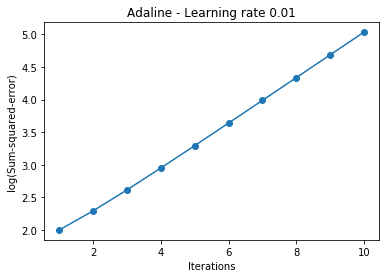

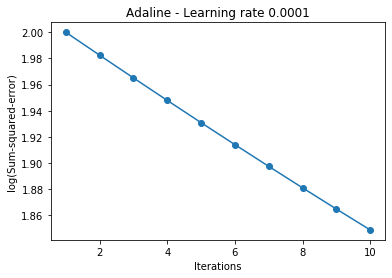

In [52]:
for eta in [0.01,0.0001]:
    ada = AdalineGD(epochs=10, eta=eta).train(X, y)
    plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
    plt.xlabel('Iterations')
    plt.ylabel('log(Sum-squared-error)')
    plt.title('Adaline - Learning rate {}'.format(str(eta)))
    plt.savefig('imgs/delta_effect_eta{}.png'.format(str(eta)))
    plt.show()

* boundary

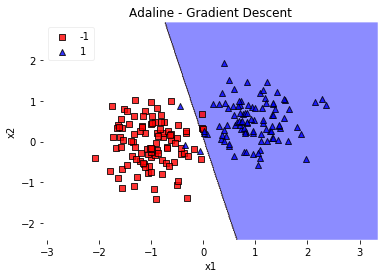

In [53]:
ada = AdalineGD(epochs=20, eta=0.001)
ada.train(X, y)
plot_decision_regions(X, y, clf=ada,legend=2,colors='red,blue')
plt.title('Adaline - Gradient Descent')
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('imgs/delta_eta{}.png'.format(str(eta)))
plt.show()


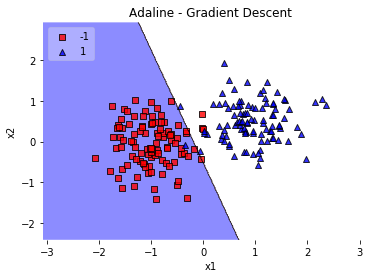

In [54]:
ada = AdalineGD(epochs=20, eta=0.01)
ada.train(X, y)
plot_decision_regions(X, y, clf=ada,legend=2,colors='red,blue')
plt.title('Adaline - Gradient Descent')
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('imgs/delta_eta{}.png'.format(str(eta)))
plt.show()

* converge compare

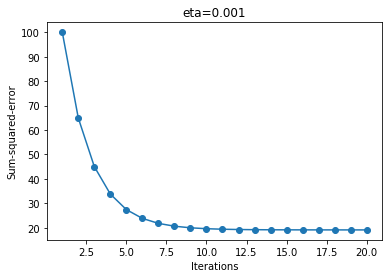

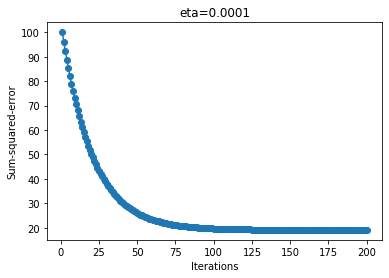

In [55]:
for eta in [0.001,0.0001]:
    ada = AdalineGD(epochs=int(20*0.001/eta), eta=eta)
    ada.train(X, y)
    plt.plot(range(1, len( ada.cost_)+1), ada.cost_, marker='o')
    plt.xlabel('Iterations')
    plt.ylabel('Sum-squared-error')
    plt.title('eta={}'.format(str(eta)))
    plt.savefig('imgs/delta_eta{}.png'.format(str(eta)))
    plt.show()
    

### question 2
Compare sequential with a batch learning approach for the Delta rule. How quickly (in terms of epochs) do the algorithms
converge? Please adjust the learning rate and plot the learning curves for each variant. Bear in mind that for 
sequential learning you should not use the matrix form of the learning rule discussed in section 2.2 and instead perform
 updates iteratively for each sample. How sensitive is learning to random initialisation?

* sequential


